In [1]:
import numpy as np
import csv
import pandas as pd
import time
import sys

In [2]:
#Transpose of 3x3 matrix
def transpose(x): 
    a11 = x[0,0]
    a12 = x[0,1]
    a13 = x[0,2]
    a21 = x[1,0]
    a22 = x[1,1]
    a23 = x[1,2]
    a31 = x[2,0]
    a32 = x[2,1]
    a33 = x[2,2]
    x = np.array([[a11,a21,a31],[a12,a22,a32],[a13,a23,a33]])
    return x

#multiply of 3x3 matrices
def muiltiply(x,y):
    a11 = x[0,0]*y[0,0]+x[0,1]*y[1,0]+x[0,2]*y[2,0]
    a12 = x[0,0]*y[0,1]+x[0,1]*y[1,1]+x[0,2]*y[2,1]
    a13 = x[0,0]*y[0,2]+x[0,1]*y[1,2]+x[0,2]*y[2,2]
    a21 = x[1,0]*y[0,0]+x[1,1]*y[1,0]+x[1,2]*y[2,0]
    a22 = x[1,0]*y[0,1]+x[1,1]*y[1,1]+x[1,2]*y[2,1]
    a23 = x[1,0]*y[0,2]+x[1,1]*y[1,2]+x[1,2]*y[2,2]
    a31 = x[2,0]*y[0,0]+x[2,1]*y[1,0]+x[2,2]*y[2,0]
    a32 = x[2,0]*y[0,1]+x[2,1]*y[1,1]+x[2,2]*y[2,1]
    a33 = x[2,0]*y[0,2]+x[2,1]*y[1,2]+x[2,2]*y[2,2]
    x = np.array([[a11,a21,a31],[a12,a22,a32],[a13,a23,a33]])
    return x

#trace of 3x3 matrix(AT A)
def trace(x):
    tra = (x[0,0]*x[1,1]*x[2,2])
    return tra

In [3]:
def timemean(dataw):
    wmean = np.mean(dataw,3)
    wmean = np.squeeze(wmean)
    return wmean
def centermean(dataw):
    wmean = timemean(dataw)
    del dataw
    a = np.int(np.ceil(wmean.shape[0]/2))
    b = np.int(np.floor(wmean.shape[0]/2))
    c = np.int(np.ceil(wmean.shape[1]/2))
    d = np.int(np.floor(wmean.shape[1]/2))
    if(a == b and c == d):                   #even even
        wc1 = wmean[a,c,:]
        wc2 = wmean[a,c-1,:]
        wc3 = wmean[a-1,c-1,:]
        wc4 = wmean[a-1,c,:]
        wc = (wc1+wc2+wc3+wc4)/4
    if(a != b and c == d):                   #odd even
        wc1 = wmean[b,c,:]
        wc2 = wmean[b,c-1,:]
        wc = (wc1+wc2)/2
    if(a == b and c != d):                   #even odd
        wc1 = wmean[b,d,:]
        wc2 = wmean[b-1,d,:]
        wc = (wc1+wc2)/2
    if(a!=b and c!=d):
        wc = wmean[b,d,:]
    return wc       

In [4]:
def sameshape3(datau,datav,dataw):
    if (datau.shape[0] != datav.shape[0] or datau.shape[0] != dataw.shape[0]
        or datau.shape[1] != datav.shape[1] or datau.shape[1] != dataw.shape[1]
        or datau.shape[2] != datav.shape[2] or datau.shape[2] != dataw.shape[2]
        or datau.shape[3] != datav.shape[3] or datau.shape[3] != dataw.shape[3]):
        print ("Please input uvw files as same shape")
        return False
    else:
        return True

In [5]:
def sameshape2(datau,datav):
    if (datau.shape[0] != datav.shape[0] or datau.shape[1] != datav.shape[1]
        or datau.shape[2] != datav.shape[2]):
        print ("Please input check if your data files are same shape")
        return False
    else:
        return True

In [6]:
def shape(dt):
    return dt.shape[0],dt.shape[1],dt.shape[2],dt.shape[3]

In [7]:
def uvw_wcdless(datau,datav,dataw):
    
    if (sameshape3(datau,datav,dataw) is False):
        return
    nx,ny,nz,nt = shape(datau)
    wc = centermean(dataw)
    U = np.zeros((nx,ny,nz,nt),dtype = np.float32)
    V = np.zeros((nx,ny,nz,nt),dtype = np.float32)
    W = np.zeros((nx,ny,nz,nt),dtype = np.float32)
    for ti in range(0,nt):
        for zi in range(0,nz):
            U[:,:,zi,ti] = (datau[:,:,zi,ti]/wc[zi])                #1
            V[:,:,zi,ti] = (datav[:,:,zi,ti]/wc[zi])
            W[:,:,zi,ti] = (dataw[:,:,zi,ti]/wc[zi])
    return U,V,W

In [8]:
def dless(data):
    nx,ny,nz,nt = shape(data)
    wc = centermean(data)
    D = np.zeros((nx,ny,nz,nt),dtype = np.float32)
    for ti in range(0,nt):
        for zi in range(0,nz):
            D[:,:,zi,ti] = (data[:,:,zi,ti]/wc[zi])                #1
    return D

In [9]:
def omega_single(datau,datav,dataw,dx,dy,dz,t):
    percent = np.str(np.round(t/datau.shape[3]*100))+"%"
    print('{}\r'.format(percent), end="")

    gu = np.gradient(datau[:,:,:,t],dx,dy,dz)
    gv = np.gradient(datav[:,:,:,t],dx,dy,dz)
    gw = np.gradient(dataw[:,:,:,t],dx,dy,dz)

    GV = np.array([[gu[0],gv[0],gw[0]],[gu[1],gv[1],gw[1]],[gu[2],gv[2],gw[2]]])
    GVT = transpose(GV)

    A = 0.5*(GV+GVT)
    B = 0.5*(GV-GVT)
    AT = transpose(A)
    BT = transpose(B)
    ATA = muiltiply(AT,A)
    BTB = muiltiply(BT,B)
    a = trace(ATA)
    b = trace(BTB)
    ef=0.001*np.max(b-a)
    return (b/(a+b+ef))

In [10]:
def omega(datau,datav,dataw,dx,dy,dz):
    
    if (sameshape3(datau,datav,dataw) is False):
        return
    np.seterr(divide='ignore', invalid='ignore')
    datau,datav,dataw = uvw_wcdless(datau,datav,dataw)
    
    ome=np.zeros((datau.shape[0],datau.shape[1],datau.shape[2],datau.shape[3]),dtype=np.float16)
    for t in range(0,datau.shape[3]):
        ome[:,:,:,t] = omega_single(datau,datav,dataw,dx,dy,dz,t)
    ome = np.nan_to_num(ome)
    return ome

In [11]:
# Memories problems
def vorticity(datau,datav,dataw,dx=45,dy=45,dz=10,dt=10):
    if (sameshape3(datau,datav,dataw) is False):
        return
    print("To calculate vorticity need at least 32gbs of RAM.")
    gu = np.gradient(datau,45,45,10,10)
    gu1 = np.array(gu[1],dtype =np.float32)
    gu2 = np.array(gu[2],dtype =np.float32)
    del gu
    
    gv = np.gradient(datav,45,45,10,10)
    gv0 = np.array(gv[0],dtype =np.float32)
    gv2 = np.array(gv[2],dtype =np.float32)
    del gv
    
    gw = np.gradient(dataw,45,45,10,10)
    gw0 = np.array(gw[0],dtype =np.float32)
    gw1 = np.array(gw[1],dtype =np.float32)
    del gw
    
    omgx = 0.5*(gw1-gv2)
    del gw1, gv2
    omgy = 0.5*(gu2-gw0)
    del gu2, gw0
    omgz = 0.5*(gv0-gu1)
    del gv0,gu1
    
    vor = np.array([2*omgx,2*omgy,2*omgz])
    return vor

In [12]:
def plumehalfgraph(dataw,datat,threshold,dx,dy,dz,D,name):
    import matplotlib.pyplot as plt
    if (sameshape2(dataw,datat) is False):
        return
    nx,ny,nz,nt = shape(datat)
    wmean = timemean(dataw)
    tmean = timemean(datat)
    wc = centermean(dataw)
    tc = centermean(datat)
    
    lt = np.zeros((nz,1),dtype=np.float32)
    zt = np.zeros((nz,1),dtype=np.float32)
    
    x = np.arange(-((nx/2)-1)*dx-(dx/2),(nx/2)*dx,dx)
    y = x
    z = np.arange(0,nz*dz,dz)
    [X,Y,Z] = np.meshgrid(x,y,z);
    
    a = np.int(np.ceil(ny/2))
    b = np.int(np.floor(ny/2))
    if(a==b): #even
        cy=a-1
    else:     #odd
        cy=b
    
    for zi in range(0,nz):
        if (tmean[nx-1,cy,zi]) >= (threshold*tc[zi]):
            lt[zi] = x[nx-1]
        else:
            for xi in range(cy,ny):
                if (tmean[xi,cy,zi]) >= (threshold*tc[zi]):
                    c = (tmean[xi,cy,zi] - (threshold*tc[zi]))/(tmean[xi,cy,zi]-tmean[(xi+1),cy,zi])
                    lt[zi] = x[xi] +c*dx;         

    tmeandls = np.zeros(nx*ny*nz,dtype = np.float32)
    tmeandls = np.reshape(tmeandls, (nx,ny,nz))
    xdlst = np.zeros(nx*nz,dtype = np.float32)
    xdlst = np.reshape(xdlst, (ny,nz))
    ydlst = xdlst
    for zi in range(0,nz):
        tmeandls[:,:,zi] = (tmean[:,:,zi]/tc[zi])
        if (lt[zi]!=0):
            xdlst[:,zi] = x[:]/lt[zi]
            ydlst[:,zi] = y[:]/lt[zi]

    graphxt = []
    graphyt = []
    for i in range(0,len(lt)):
        if (lt[i] != 0):
            graphxt = np.append(graphxt, ((i+1)*dz/D))
            graphyt = np.append(graphyt,lt[i]/D)

    graphxt = np.reshape(graphxt, (len(graphxt), 1))
    graphyt = np.reshape(graphyt, (len(graphyt), 1))

    lw = np.zeros((nz,1),dtype=np.float32)
    zw = np.zeros((nz,1),dtype=np.float32)
    for zi in range(0,nz):
        if (wmean[nx-1,cy,zi]) >= (threshold*wc[zi]):
            lw[zi] = x[nx-1]
        else:
            for xi in range(cy,nx):
                if (wmean[xi,cy,zi]) >= (threshold*wc[zi]):
                    c = (wmean[xi,cy,zi] - (threshold*wc[zi]))/(wmean[xi,cy,zi]-wmean[(xi+1),cy,zi])
                    lw[zi] = x[xi] +c*dx;         
    wmeandls = np.zeros(nx*ny*nz,dtype = np.float32)
    wmeandls = np.reshape(wmeandls, (nx,ny,nz))
    xdlsw = np.zeros(nx*nz,dtype = np.float32)
    xdlsw = np.reshape(xdlsw, (ny,nz))
    ydlsw = xdlsw
    for zi in range(0,nz):
        wmeandls[:,:,zi] = (wmean[:,:,zi]/wc[zi])
        if (lw[zi]!=0):
            xdlsw[:,zi] = x[:]/lw[zi]
            ydlsw[:,zi] = y[:]/lw[zi]

    graphxw = []
    graphyw = []
    for i in range(0,len(lw)):
        if (lw[i] != 0):
            graphxw = np.append(graphxw, ((i+1)*dz/D))
            graphyw = np.append(graphyw,lw[i]/D)

    graphxw = np.reshape(graphxw, (len(graphxw), 1))
    graphyw = np.reshape(graphyw, (len(graphyw), 1))
    plt.figure(figsize=(10,10))
    plt.ylabel('Z/D')
    plt.xlabel('halfwidth')
    plt.title(name)# giving a title to my graph
    plt.plot(graphyt, graphxt,label='Tmean')
    plt.plot(graphyw, graphxw,label='Wmean')
    plt.legend()
    plt.show()
    return

In [13]:
def topviewmap(data,datatype,filename,dx=45,dy=45,dz=10,D=400,frame=20):
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    from matplotlib import animation
    
    nx,ny,nz,nt = shape(data)
    data = np.mean(data,3)
    datadless = np.zeros((nx,ny,nz),dtype = np.float32) #created a empty dimensionless data
    
    #solving for WC
    a = np.int(np.ceil(data.shape[0]/2))
    b = np.int(np.floor(data.shape[0]/2))
    c = np.int(np.ceil(data.shape[1]/2))
    d = np.int(np.floor(data.shape[1]/2))
    if(a == b and c == d):                   #even even
        wc1 = data[a,c,:]
        wc2 = data[a,c-1,:]
        wc3 = data[a-1,c-1,:]
        wc4 = data[a-1,c,:]
        wc = (wc1+wc2+wc3+wc4)/4
    if(a != b and c == d):                   #odd even
        wc1 = data[b,c,:]
        wc2 = data[b,c-1,:]
        wc = (wc1+wc2)/2
    if(a == b and c != d):                   #even odd
        wc1 = data[b,d,:]
        wc2 = data[b-1,d,:]
        wc = (wc1+wc2)/2
    if(a!=b and c!=d):
        wc = data[b,d,:]
        
    #Dimensionless Data divied by WC
    for zi in range(0,nz):
        datadless[:,:,zi] = (data[:,:,zi]/wc[zi])
        
    wmax = datadless[:,:,np.int(np.round(nz*0.15)):np.int(np.round(nz*0.85))].max()
    wmin = datadless[:,:,np.int(np.round(nz*0.15)):np.int(np.round(nz*0.85))].min()
    
    fig = plt.figure(figsize=(10,10))
    data = datadless[:,:,0]
    ax = plt.axes()
    sns.heatmap(data,vmin=wmin,vmax=wmax,fmt='.1f',cbar_kws={'label': datatype})

    xaxis = []
    for x in range (0,nx+1,5):
        xaxis.append(x*dx/D)
    yaxis = []
    for y in range (0,ny+1,5):
        yaxis.append(y*dy/D)
        
    def init():
        sns.heatmap(np.zeros((nx, ny)),vmin=wmin,vmax=wmax,fmt='.1f',cbar = False)

    def animate(i):
        i = i +3
        data = datadless[:,:,i*frame]
        sns.heatmap(data,vmin=wmin,vmax=wmax,fmt='.1f',cbar = False)
        ax.set_title('Dimensionless ' + datatype+' '+filename+', z = '+str(round(i*frame*dz/D,2)),fontsize = 20)
        ax.set_ylabel('Y/D',fontsize = 20)
        ax.set_xlabel('X/D',fontsize = 20)
        ax.set_xticks(np.linspace(0, dx, dz))
        ax.set_xticklabels(xaxis)
        ax.set_yticks(np.linspace(0, dx, dz))
        ax.set_yticklabels(yaxis)
        ax.invert_yaxis()
    fr = np.int(np.round(nz/frame*0.9))
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames= fr, interval=400,repeat = False)

    # fig.tight_layout()
    anim.save(filename+'.gif', writer='matplotlib.animation.PillowWritter')

In [14]:
def lambda2(datau,datav,dataw,dx=40,dy=40,dz=10):
    if (sameshape3(datau,datav,dataw) is False):
        return
    nx,ny,nz,nt = shape(datau)
    import multifluidlab
    import multiprocessing as mp
    from multiprocessing import Pool
    if __name__ == '__main__':
        pool = mp.Pool(mp.cpu_count())
        results = pool.starmap(multifluidlab.lambda2,[(datau,datav,dataw,t,dx,dy,dz) for t in range(nt)])
        lamb2=np.zeros((nx,ny,nz,nt),dtype=np.float32)
        for i in range(nt):
            lamb2[:,:,:,i] = results[i]     
        return lamb2
    
#try to parallel for i in range of nx

In [15]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,243])
b = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,243])
c = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,243])
da = np.reshape(a, (2,2,2,3), order="F")
db = np.reshape(b, (2,2,2,3), order="F")
dc = np.reshape(c, (2,2,2,3), order="F")

In [58]:
Start = 0 # numer of rows in dataset
End = 400 # time start

sk = Start*45*45*700
nr = End - Start
n = 45*45*700*nr

#'/Volumes/ThanhPor/Helium_FLUX_1/He_h01_01_W.csv'

# dft = pd.read_csv('D:\Helium_FLUX_1\He_h01_01_T.csv',skiprows = sk,nrows = n, dtype =np.float32)
# datat = dft.to_numpy()
dfu = pd.read_csv("C:/Users/Sound of Silence/Desktop/Helium_FLUX_1/He_h01_01_U.csv",skiprows = sk,nrows = n, dtype =np.float32)
datau = dfu.to_numpy()
del dfu
dfv = pd.read_csv(r'C:\Users\Sound of Silence\Desktop\Helium_FLUX_1\He_h01_01_V.csv',skiprows = sk,nrows = n, dtype =np.float32)
datav = dfv.to_numpy()
del dfv
dfw = pd.read_csv(r'C:\Users\Sound of Silence\Desktop\Helium_FLUX_1\He_h01_01_W.csv',skiprows = sk,nrows = n, dtype =np.float32)
dataw = dfw.to_numpy()
del dfw

#Shaping data into actural shape (45*45*700)
# datat = np.reshape(datat, (45,45,700,nr), order="F")
datau = np.reshape(datau, (45,45,700,nr), order="F")
datav = np.reshape(datav, (45,45,700,nr), order="F")
dataw = np.reshape(dataw, (45,45,700,nr), order="F")

In [59]:
tic = time.perf_counter()
ome = omega(datau,datav,dataw,dx=45,dy=45,dz=10)
toc1 = time.perf_counter()
print(f"Eigen: {toc1 - tic:0.4f} seconds")
#468

Eigen: 381.4365 seconds


In [67]:
ome = np.reshape(ome, (nx*ny*nz*nr,1), order="F")
ome.shape

(567000000, 1)

In [ ]:
tic = time.perf_counter()

import csv
filename = "Omega_Helium.csv"
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile) 
#     csvwriter.writerow(['index','value']) # write the header
    # writing the data rows  
    csvwriter.writerows(ome)
toc = time.perf_counter()
print(f"Downloaded the tutorial in {toc - tic:0.4f} seconds")

In [44]:
nx,ny,nz,nt = shape(datau)
ome_mean = np.zeros((ny,nz,nt),dtype = np.float32)

In [45]:
for t in range(nt):
    ome_mean[:,:,t] = np.mean(ome[:,:,:,t],0)

In [64]:
ome.shape

(45, 45, 700, 400)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import animation

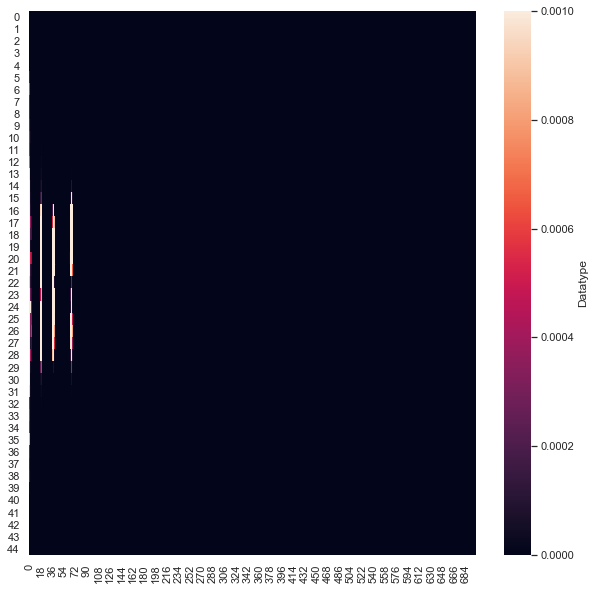

In [57]:
# wmax = ome_mean[:,:,np.int(np.round(nz*0.15)):np.int(np.round(nz*0.85))].max()
# wmin = ome_mean[:,:,np.int(np.round(nz*0.15)):np.int(np.round(nz*0.85))].min()
wmax =0.001
wmin =0
datatype = "Datatype"
fig = plt.figure(figsize=(10,10))
data = ome_mean[:,:,80]
ax = plt.axes()
sns.heatmap(data,vmin=wmin,vmax=wmax,fmt='.1f',cbar_kws={'label': datatype})